In [1]:
import pandas as pd
from transformers import pipeline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
data = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding='latin-1', header=None)
data.columns = ['target', 'id', 'date', 'flag', 'user', 'text']
texts = data['text'].head(3).tolist()  # Use first 3 tweets for demo

In [3]:
# Initialize sentiment analysis pipeline
sentiment_analyzer = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

Device set to use cuda:0


In [4]:
# Analyze sentiments
results = [sentiment_analyzer(text)[0] for text in texts]

Text(0, 0.5, 'Text')

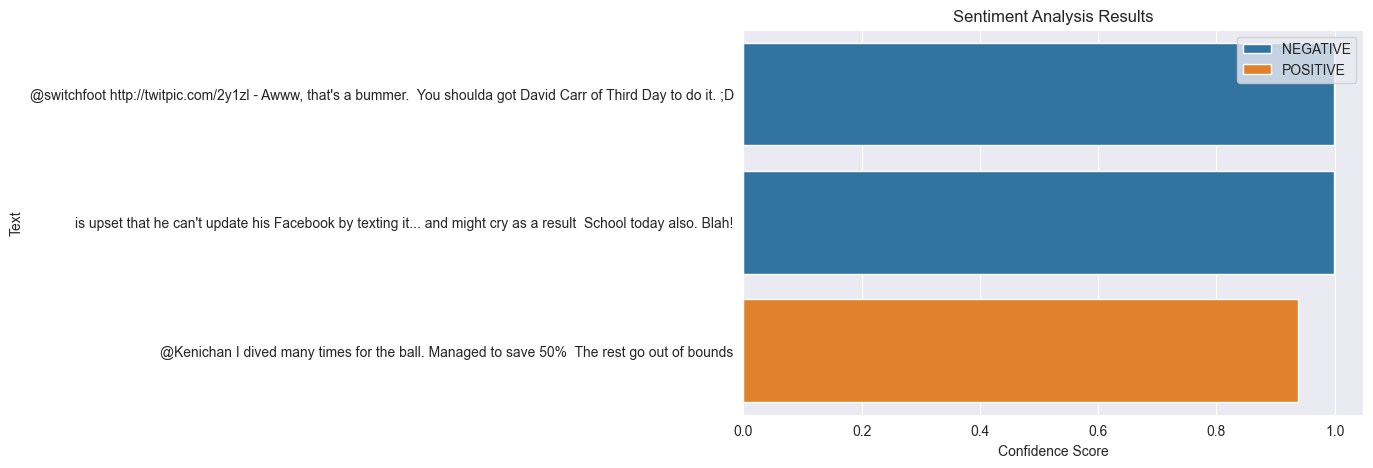

In [5]:
# Visualize results
labels = [result['label'] for result in results]
scores = [result['score'] for result in results]
plt.figure(figsize=(8, 5))
sns.barplot(x=scores, y=texts, hue=labels)
plt.title('Sentiment Analysis Results')
plt.xlabel('Confidence Score')
plt.ylabel('Text')
# plt.savefig('sentiment_analysis.png')  # Save for mockup